In [1]:
#importing all required libraries 
import numpy as np #Need for numerical computation(if required)
import pandas as pd#Need for data manipulation,analysis and handling tabular data
import matplotlib.pyplot as plt #need for visualization

In [2]:
# Loading the cleaned data set which has already saved after the cleaning in the data cleaning part
df=pd.read_csv("02_Adidas us sales cleaned data set.csv")

# Data Visualizations

In [14]:
# Grouping data by region for regional analysis
tdf = df.groupby("region").agg({"revenue": "sum", "profit": "sum"}).reset_index()
print(tdf)

      region   revenue   profit
0    Midwest  16654434  5274020
1  Northeast  25078267  6802150
2      South  20544731  6093344
3  Southeast  21374436  6055601
4       West  36344407  8932969


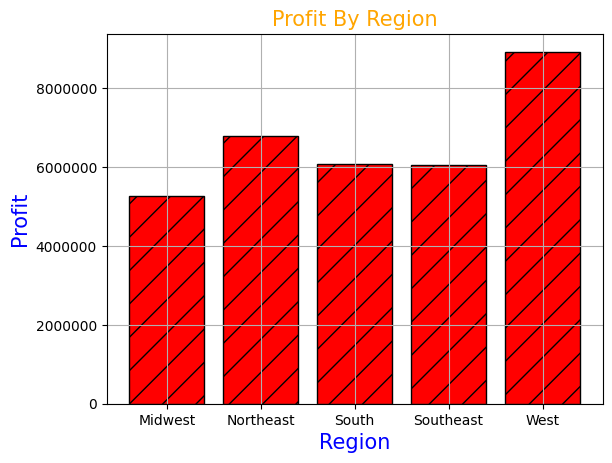

In [15]:
# Plotting profit by region using a bar chart.
plt.bar(tdf["region"], tdf["profit"], color="r", edgecolor="k", hatch="/")
plt.xlabel("Region", color="b", size=15)  # Label for the x-axis
plt.ylabel("Profit", color="b", size=15)  # Label for the y-axis
plt.title("Profit By Region", color="orange", size=15)  # Title for the chart
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

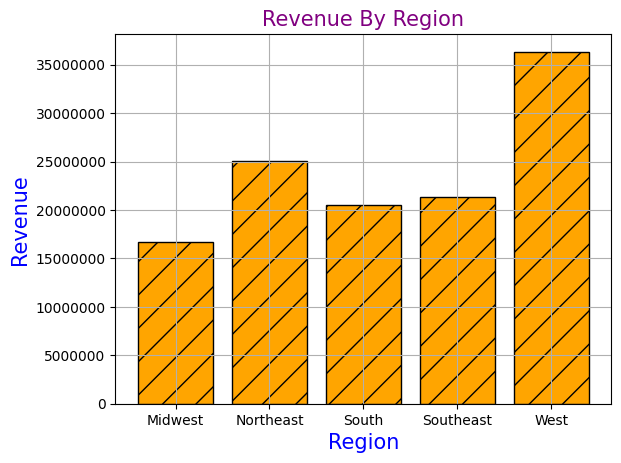

In [16]:
# Plotting revenue by region using a bar chart.
plt.bar(tdf["region"], tdf["revenue"], color="orange", edgecolor="k", hatch="/")
plt.xlabel("Region", color="b", size=15)  # Label for the x-axis
plt.ylabel("Revenue", color="b", size=15)  # Label for the y-axis
plt.title("Revenue By Region", color="purple", size=15)  # Title for the chart
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

                     product   revenue   profit
0              Men's Apparel  16484882  4456719
1    Men's Athletic Footwear  20532180  5168997
2      Men's Street Footwear  27680769  8280294
3            Women's Apparel  23814985  6856750
4  Women's Athletic Footwear  14311521  3896040
5    Women's Street Footwear  17171938  4499284


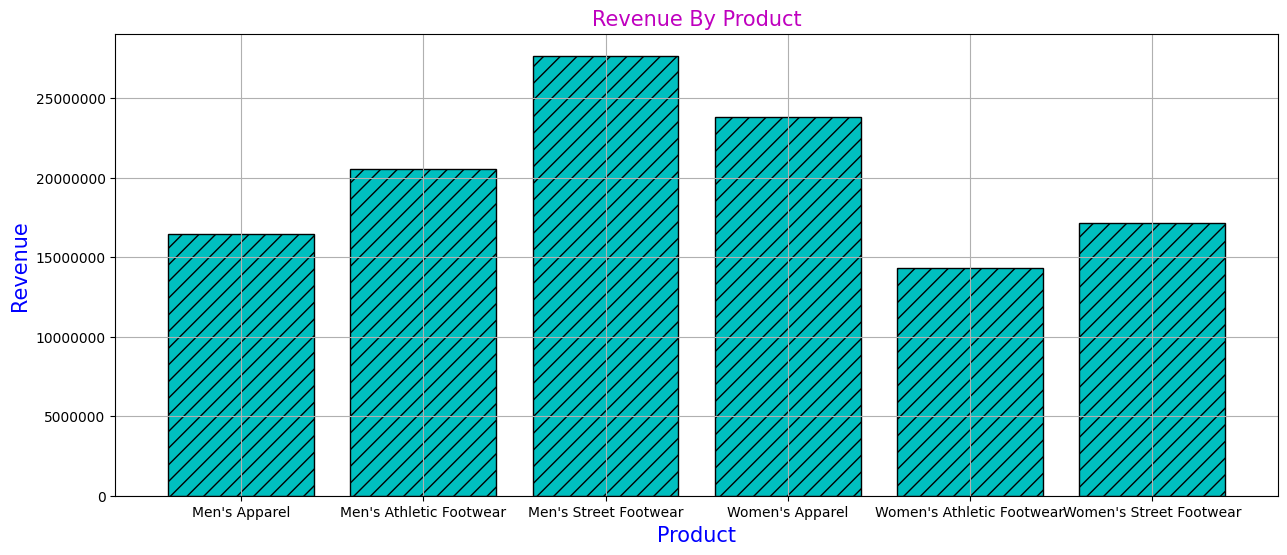

In [8]:
# Grouping data by product to calculate total revenue and profit for each product.
product_groupdf = df.groupby("product").agg({"revenue": "sum", "profit": "sum"}).reset_index()
print(product_groupdf)  # Displaying grouped data for reference

# Plotting revenue by product using a bar chart.
plt.figure(figsize=(15,6))#increasing the fogure size
plt.bar(product_groupdf["product"], product_groupdf["revenue"], color="c", edgecolor="k", hatch="//")
plt.xlabel("Product", color="b", size=15)  # Label for the x-axis
plt.ylabel("Revenue", color="b", size=15)  # Label for the y-axis
plt.title("Revenue By Product", color="m", size=15)  # Title for the chart
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

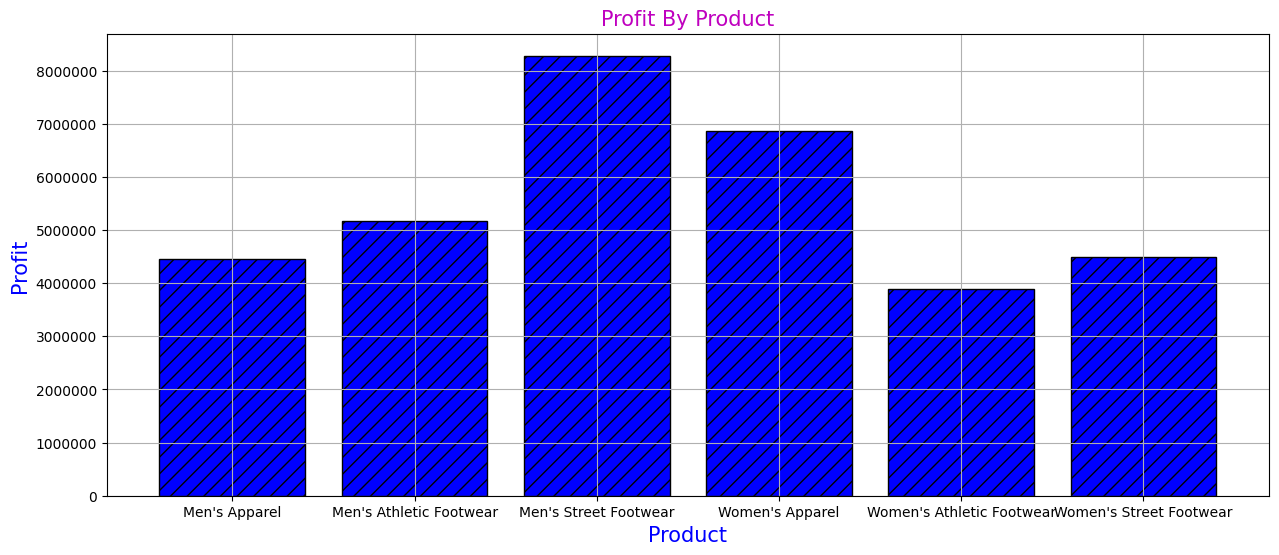

In [17]:
# Plotting profit by product using a bar chart.
plt.figure(figsize=(15,6))#increasing the fogure size
plt.bar(product_groupdf["product"], product_groupdf["profit"], color="b", edgecolor="k", hatch="//")
plt.xlabel("Product", color="b", size=15)  # Label for the x-axis
plt.ylabel("Profit", color="b", size=15)  # Label for the y-axis
plt.title("Profit By Product", color="m", size=15)  # Title for the chart
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

In [3]:
# Converting the 'invoice_date' column to datetime format to ensure proper date handling
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
# Convert invoice date to month name
df["invoice_date"] = df["invoice_date"].dt.month_name()  
df["invoice_date"] = df["invoice_date"].astype("string")  # Ensure the column is of string type
mnthdf = df.groupby("invoice_date").agg({"revenue": "sum", "profit": "sum", "units_sold": "sum"}).reset_index()
mnthdf.rename(columns={"invoice_date": "month", "units_sold": "product_sold"}, inplace=True)  # Rename columns for clarity

# Defining the correct chronological order for months
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
mnthdf["month"] = pd.Categorical(mnthdf["month"], categories=month_order, ordered=True)
mnthdf = mnthdf.sort_values("month").reset_index(drop=True)  # Sort months chronologically

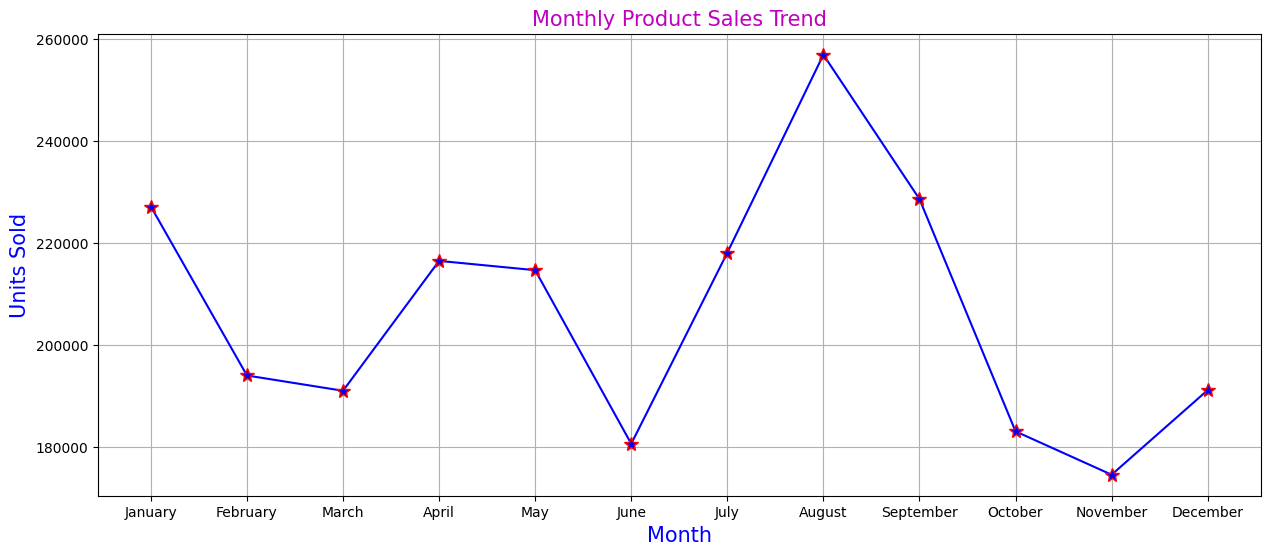

In [5]:
# Plotting monthly product sales trends using a line chart.
plt.figure(figsize=(15,6))#increasing the fogure size
plt.plot(mnthdf["month"], mnthdf["product_sold"], "*-", mfc="b", mec="r", ms=10, color="b")
plt.xlabel("Month", size=15, color="b")  # Label for the x-axis
plt.ylabel("Units Sold", size=15, color="b")  # Label for the y-axis
plt.title("Monthly Product Sales Trend", size=15, color="m")  # Title for the chart
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

  sales_method  units_sold
0     In-store      689990
1       Online      939093
2       Outlet      846528


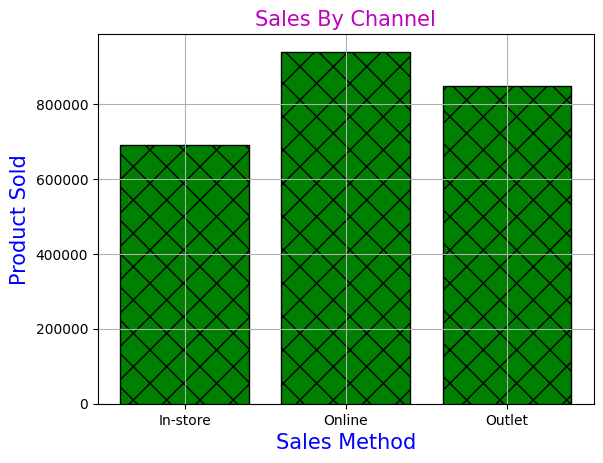

In [6]:
# Grouping data by sales method to calculate total units sold through each channel.
channel_df = df.groupby("sales_method").agg({"units_sold": "sum"}).reset_index()
print(channel_df)  # Displaying grouped data for reference 

# Plotting sales by channel using a bar chart.
plt.bar(channel_df["sales_method"], channel_df["units_sold"], color="g", edgecolor="k", hatch="X")
plt.xlabel("Sales Method", color="b", size=15)  # Label for the x-axis
plt.ylabel("Product Sold", color="b", size=15)  # Label for the y-axis
plt.title("Sales By Channel", color="m", size=15)  # Title for the chart
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

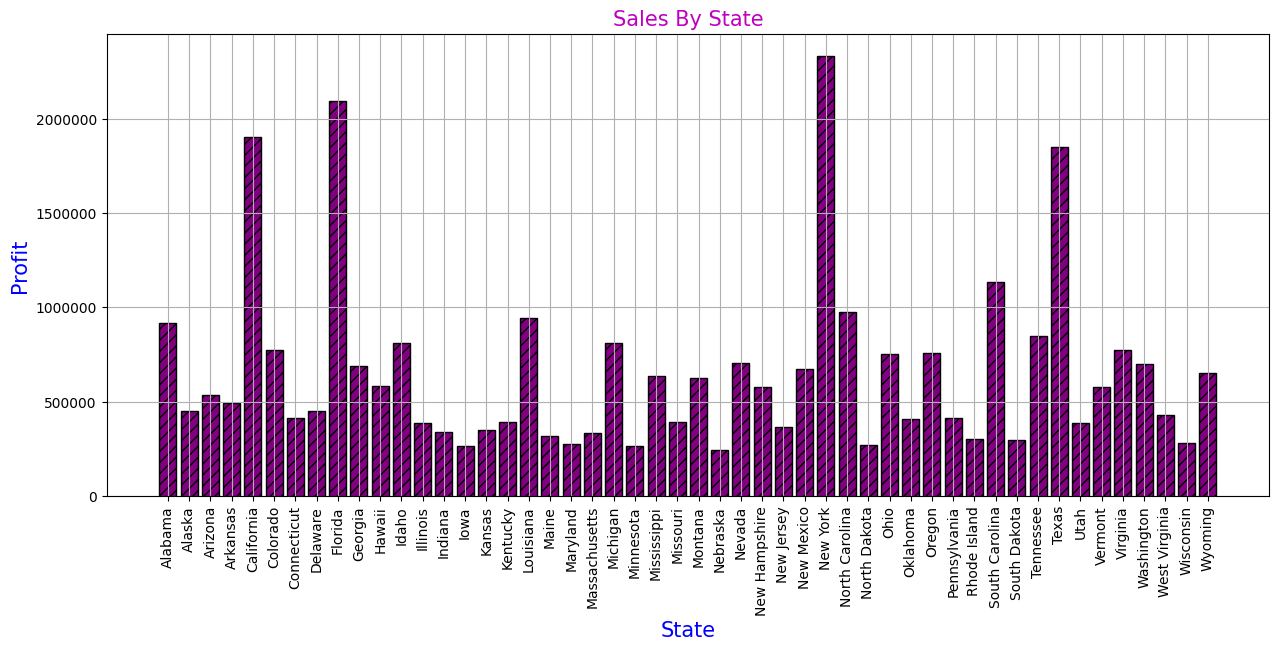

In [8]:
# Grouping data by state to calculate total profit and units sold for each state.
state_df = df.groupby("state").agg({"profit": "sum", "units_sold": "sum"}).reset_index()

# Plotting state-wise profit using a bar chart.
plt.figure(figsize=(15,6))#increasing the fogure size
plt.bar(state_df["state"], state_df["profit"], color="purple", edgecolor="k", hatch="///")
plt.xlabel("State", color="b", size=15)  # Label for the x-axis
plt.ylabel("Profit", color="b", size=15)  # Label for the y-axis
plt.title("Sales By State", color="m", size=15)  # Title for the chart
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

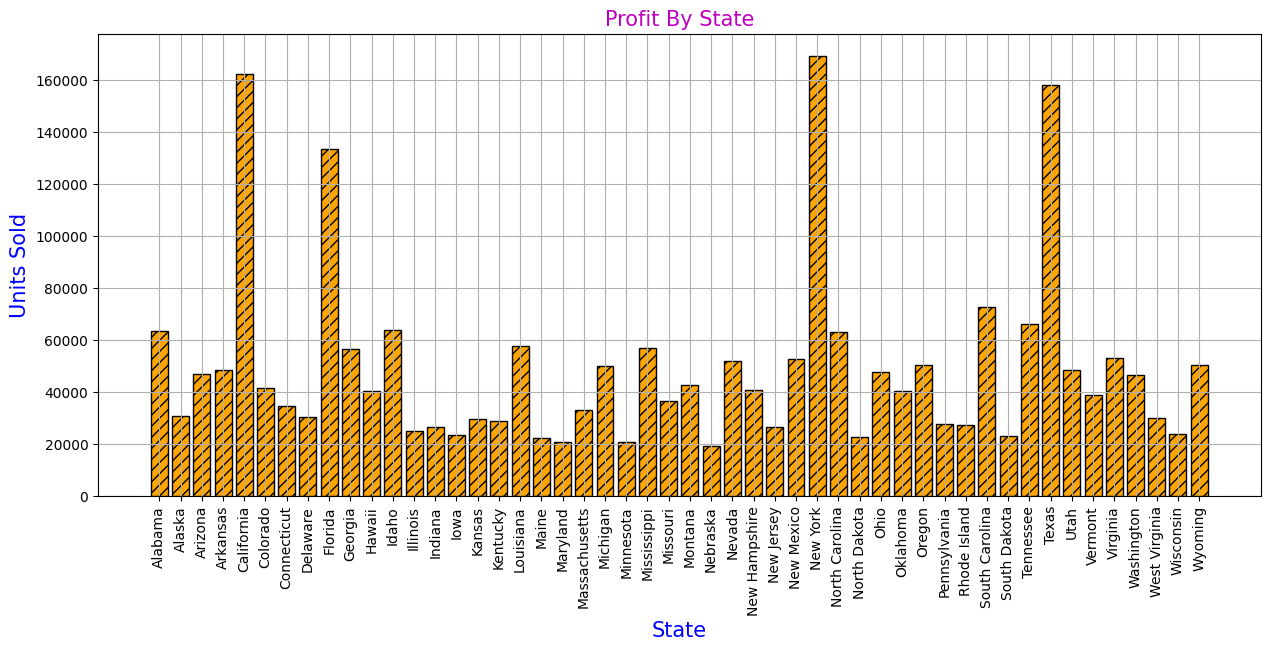

In [10]:
# Plotting state-wise units sold using a bar chart.
plt.figure(figsize=(15,6))#increasing the fogure size
plt.bar(state_df["state"], state_df["units_sold"], color="orange", edgecolor="k", hatch="///")
plt.xlabel("State", color="b", size=15)  # Label for the x-axis
plt.ylabel("Units Sold", color="b", size=15)  # Label for the y-axis
plt.title("Profit By State", color="m", size=15)  # Title for the chart
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

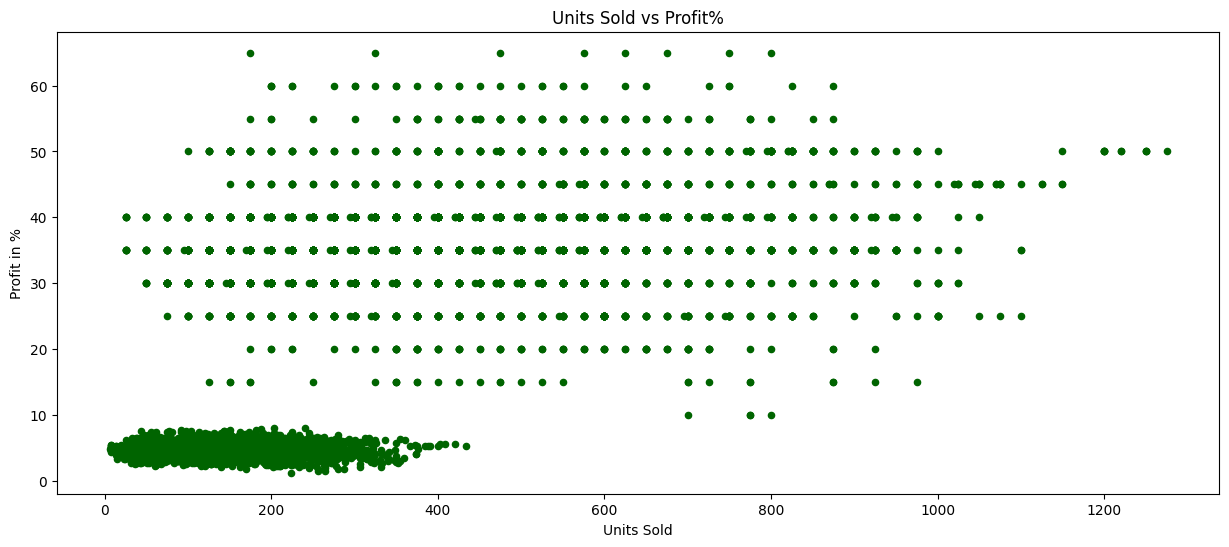

In [12]:
# Plotting correlation between units sold and profit margin using a scatter plot.
plt.figure(figsize=(15,6))#increasing the fogure size
plt.scatter(df["units_sold"], df["profit_margin"], color="darkgreen", s=20)
plt.xlabel("Units Sold")  # Label for the x-axis
plt.ylabel("Profit in %")  # Label for the y-axis
plt.title("Units Sold vs Profit%")  # Title for the chart
plt.show()  # Display the plot